In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

execution time is 0.007751941680908203 ms


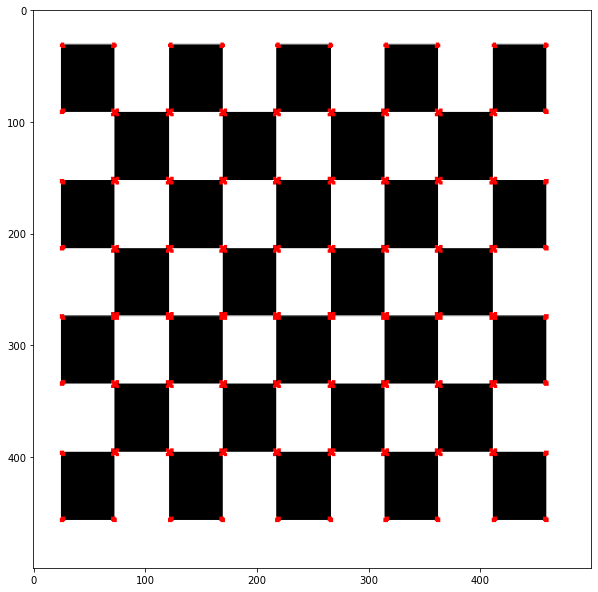

In [20]:
img = cv2.imread('Chess/chess.png')
img = cv2.resize(img,(500,500))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
t1 = time.time()
img_corner = cv2.cornerHarris(img_gray,2,5,0.04)
img_corner = cv2.dilate(img_corner, None)
img[img_corner > 0.01 * img_corner.max()]=[0, 0, 255]
t2 = time.time()
cv2.imwrite('chess.png',img)
plt.figure(figsize=(10,24))
plt.imshow(img[:,:,::-1]);

print(f"execution time is {t2-t1} ms")

execution time is 0.0030007362365722656 ms


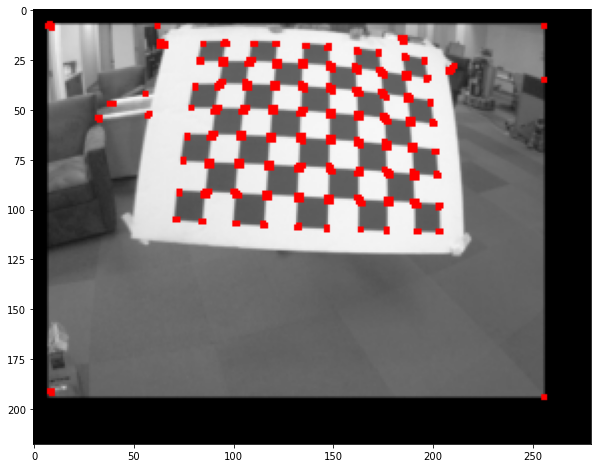

In [5]:

img = cv2.imread('Chess/001.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
t1 = time.time()
img_corner = cv2.cornerHarris(img_gray,2,3,0.04)
img_corner = cv2.dilate(img_corner, None)
img[img_corner > 0.07 * img_corner.max()]=[0, 0, 255]
t2 = time.time()
cv2.imwrite('001.png',img)
plt.figure(figsize=(10,24))
plt.imshow(img[:,:,::-1]);

print(f"execution time is {t2-t1} ms")

In [4]:
def nothing(x):
    pass

cv2.namedWindow('output')
cv2.createTrackbar('x', 'output', 1, 20, nothing)
cv2.createTrackbar('y', 'output', 1, 20, nothing)
cv2.createTrackbar('z', 'output', 1, 20, nothing)
cv2.createTrackbar('i', 'output', 0, 5, nothing)

while 1:
    x = cv2.getTrackbarPos('x', 'output')
    y = cv2.getTrackbarPos('y', 'output')/100
    z = cv2.getTrackbarPos('z', 'output')/100
    i = cv2.getTrackbarPos('i', 'output')+1

    img = cv2.imread(f'Chess/00{i}.png')

    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    t1 = time.time()
    img_corner = cv2.goodFeaturesToTrack(img_gray,100,0.01,10,useHarrisDetector=False)
    img_corner = np.int0(img_corner)
    img_corner1 = cv2.cornerHarris(img_gray,x,5,y)
    img_corner1 = cv2.dilate(img_corner1, None)
    img[img_corner1 > z * img_corner1.max()]=[255, 0, 0]
    t2 = time.time()

    for i in img_corner:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,(0,0,255),thickness=1)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(t2-t1), (20, 20), font, 1, (220, 120, 25), 2, cv2.FILLED)
    cv2.imshow('output',img)
    k = cv2.waitKey(1)
    if k == ord('s'):
        cv2.imwrite(f'00{i}.png',img)
    if k == ord('q'):
        break

cv2.destroyAllWindows()

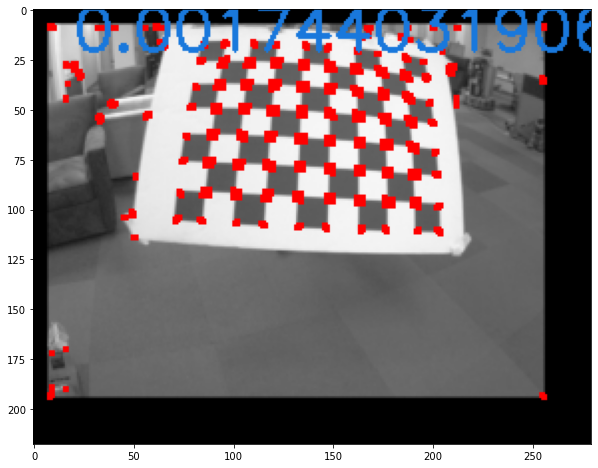

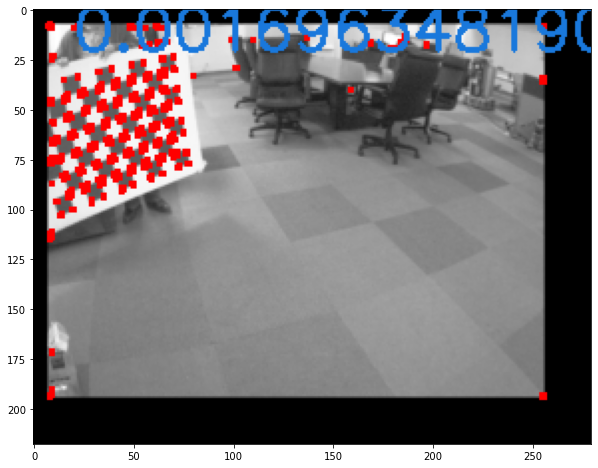

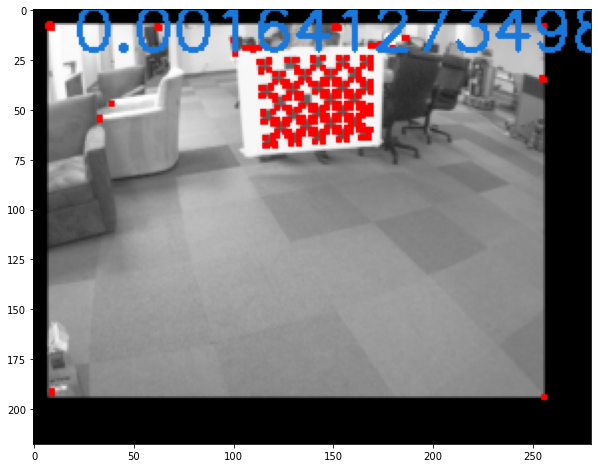

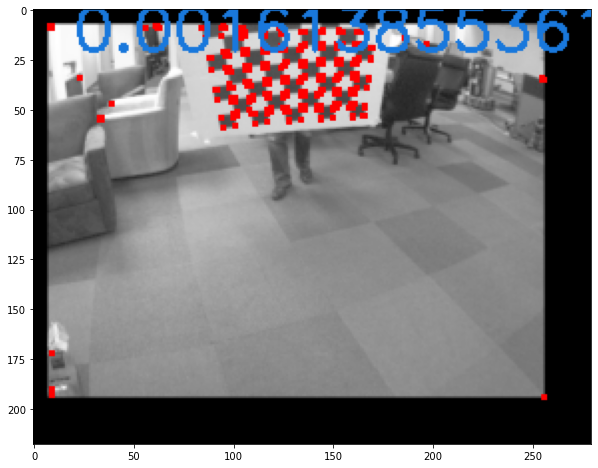

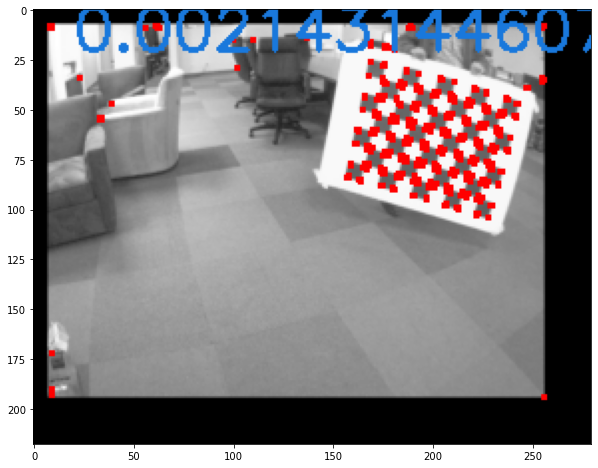

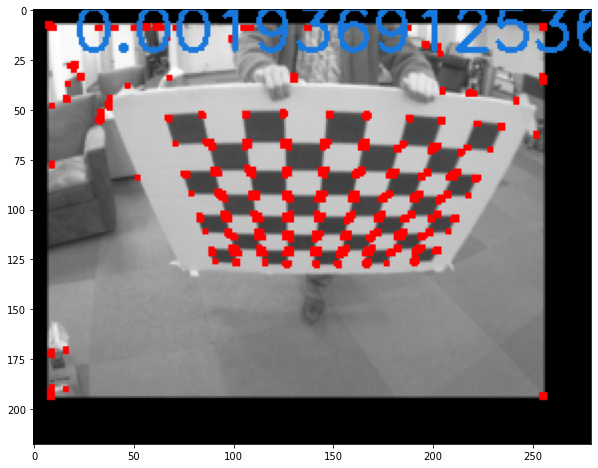

In [3]:
for i in range(1,7):
    img = cv2.imread(f'00{i}.png')
    plt.figure(figsize=(10,24))
    plt.imshow(img[:,:,::-1]);